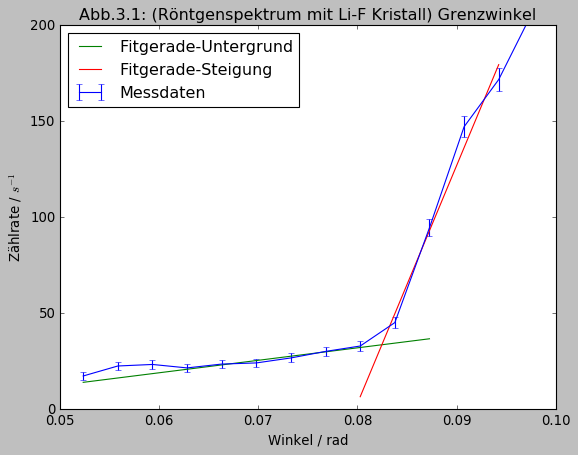

die Schnittpunkt:  0.0824694443038 +- 0.0245875927198
der relative Fehler der y-Schnitt von Gerade 1 ist zu gross:  -0.2332794751
3.29925972708e-11 1.0036163626e-11
Planksche' Konstante: h =  6.172790953667567e-23 +- 1.8705427132325963e-23
0.104052823515


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))
def lin(x, a, b):
    return x*a+b
winkel, zahlrate = np.loadtxt('LiF.txt', usecols=(0,1), unpack =True, converters={0:comma_to_float, 1:comma_to_float})
winkel *= np.pi / 180.
fehler_zahlrate = np.sqrt(zahlrate/5)
plt.errorbar(winkel, zahlrate, yerr = fehler_zahlrate, label = 'Messdaten')
plt.xlabel('Winkel / rad')
plt.ylabel('Zählrate / $s^{-1}$')
plt.xlim((0.05, 0.1))
plt.ylim((0,200))
popt,pcov = curve_fit(lin, winkel[3:9], zahlrate[3:9])
plt.plot(winkel[:11], lin(winkel[:11], popt[0], popt[1]), label = 'Fitgerade-Untergrund')
popt2,pcov2 = curve_fit(lin, winkel[9:13], zahlrate[9:13])
plt.plot(winkel[8:13], lin(winkel[8:13], popt2[0], popt2[1]), label = 'Fitgerade-Steigung')
plt.title('Abb.3.1: (Röntgenspektrum mit Li-F Kristall) Grenzwinkel')
plt.legend(loc='best')
plt.show()
plt.savefig('roentgen.pdf',format ='pdf', pixel=1000.)
grenzwinkel = (popt2[1]-popt[1])/(popt[0]-popt2[0])
fehler_grenzwinkel = grenzwinkel * np.sqrt(pcov[0][0]/(popt[0]**2)+pcov[1][1]/(popt[1]**2)+pcov2[0][0]/(popt2[0]**2)+pcov2[1][1]/(popt2[1]**2))
print('die Schnittpunkt: ', grenzwinkel, '+-', fehler_grenzwinkel)
print('der relative Fehler der y-Schnitt von Gerade 1 ist zu gross: ',np.sqrt(pcov[1][1])/popt[1])
d = 201.4e-12
U = 35000.
e = 1.6022e-19
c = 2.9979e8
wl = 2*d*np.sin(0.082)
fehler_wl = 2*d*np.cos(0.082)*0.025
print(wl, fehler_wl)
h = 3.3*e*U/c
fehler_h = 1.*e*U/c
print('Planksche\' Konstante: h = ', h, '+-',fehler_h)
print(np.sqrt(pcov2[0][0])/popt2[0])

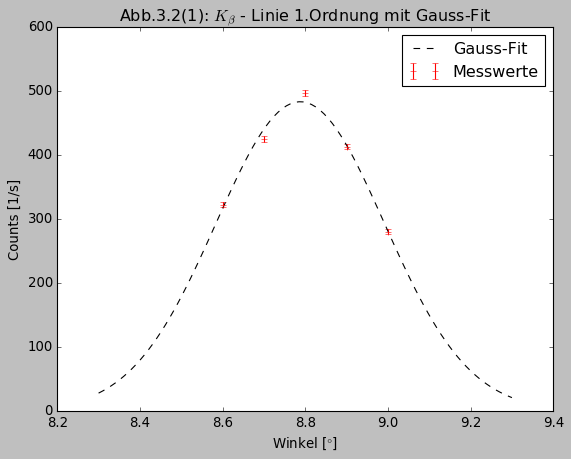

Gauss-Parameter: a, x0, sigma: 482.811622233 8.78778914876 0.203749699367
0.00549248912157


In [94]:
## defining a gaussion curve for the fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))
import matplotlib.style as mlps
mlps.use('classic')
winkel2, zahlrate2 = np.loadtxt('LiF2.txt', usecols=(0,1), unpack =True, converters={0:comma_to_float, 1:comma_to_float})
fehler_zahlrate2 = np.sqrt(zahlrate2/20)
## computing the optimized curve parameters
popt, pcov = curve_fit(gaussian, winkel2[6:11], zahlrate2[6:11], p0=[496.05, 8.8, 0.25],sigma=fehler_zahlrate2[6:11])
## plotting
plt.xlabel('Winkel [$\degree$]')
plt.ylabel('Counts [1/s]')
plt.title('Abb.3.2(1): $K_{\\beta}$ - Linie 1.Ordnung mit Gauss-Fit')
plt.errorbar(winkel2[6:11], zahlrate2[6:11], yerr = fehler_zahlrate2[6:11], fmt='r+',label='Messwerte')
x = np.linspace(8.3, 9.3, 100)
plt.plot(x, gaussian(x, *popt), 'k--', label='Gauss-Fit')
plt.legend()
plt.savefig('kb1.pdf', format='pdf', dpi=1000)
plt.show()
print("Gauss-Parameter: a, x0, sigma:", *popt)
print(np.sqrt(pcov[1][1]))

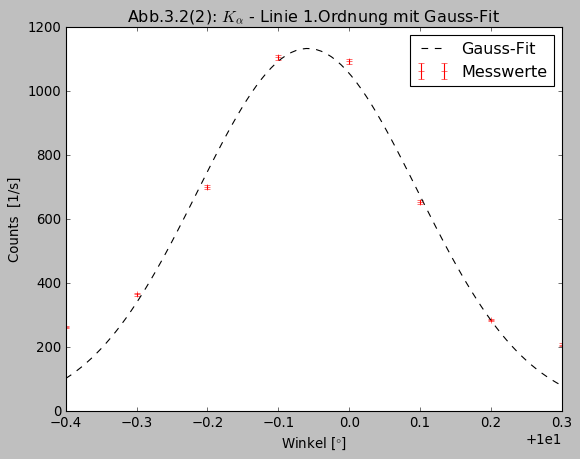

Gauss-Parameter: a, x0, sigma: 1132.03120552 9.94145194108 0.155231028055
0.00444441771546


In [104]:
popt2, pcov2 = curve_fit(gaussian, winkel2[17:-8], zahlrate2[17:-8], p0=[1100, 9.9, 0.25],sigma=fehler_zahlrate2[17:-8])
## plotting
plt.xlabel('Winkel [$\degree$]')
plt.ylabel('Counts  [1/s]')
plt.title('Abb.3.2(2): $K_{\\alpha}$ - Linie 1.Ordnung mit Gauss-Fit')
plt.errorbar(winkel2[16:-7], zahlrate2[16:-7], yerr = fehler_zahlrate2[16:-7], fmt='r+',label='Messwerte')
x = np.linspace(9.6, 10.3, 100)
plt.plot(x, gaussian(x, *popt2), 'k--', label='Gauss-Fit')
plt.legend()
plt.savefig('ka1.pdf', format='pdf', dpi=1000)
plt.show()
print("Gauss-Parameter: a, x0, sigma:", *popt2)
print(np.sqrt(pcov2[2][2]))

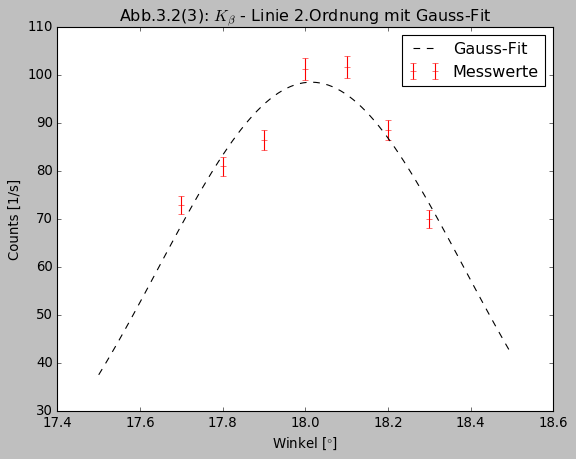

Gauss-Parameter: a, x0, sigma: 98.4445154245 18.0142790741 0.370067753225
0.0183299682612


In [96]:
winkel3, zahlrate3 = np.loadtxt('LiF3.txt', usecols=(0,1), unpack =True, converters={0:comma_to_float, 1:comma_to_float})
fehler_zahlrate3 = np.sqrt(zahlrate3/20)
popt3, pcov3 = curve_fit(gaussian, winkel3[7:14], zahlrate3[7:14], p0=[99., 18., 0.3],sigma=fehler_zahlrate3[7:14])
## plotting
plt.xlabel('Winkel [$\degree$]')
plt.ylabel('Counts [1/s]')
plt.title('Abb.3.2(3): $K_{\\beta}$ - Linie 2.Ordnung mit Gauss-Fit')
plt.errorbar(winkel3[7:14], zahlrate3[7:14], yerr = fehler_zahlrate3[7:14], fmt='r+',label='Messwerte')
x = np.linspace(17.5, 18.5, 100)
plt.plot(x, gaussian(x, *popt3), 'k--', label='Gauss-Fit')
plt.legend()
plt.savefig('kb2.pdf', format='pdf', dpi=1000)
plt.show()
print("Gauss-Parameter: a, x0, sigma:", *popt3)
print(np.sqrt(pcov3[1][1]))

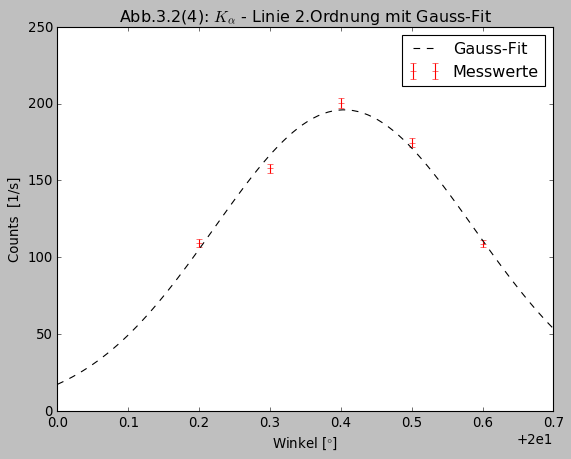

Gauss-Parameter: a, x0, sigma: 195.891914604 20.4045456722 0.183342546372
0.00631159819863


In [97]:
popt4, pcov4 = curve_fit(gaussian, winkel3[-9:-4], zahlrate3[-9:-4], p0=[200., 20.4, 0.3],sigma=fehler_zahlrate3[-9:-4])
## plotting
plt.xlabel('Winkel [$\degree$]')
plt.ylabel('Counts  [1/s]')
plt.title('Abb.3.2(4): $K_{\\alpha}$ - Linie 2.Ordnung mit Gauss-Fit')
plt.errorbar(winkel3[-9:-4], zahlrate3[-9:-4], yerr = fehler_zahlrate3[-9:-4], fmt='r+',label='Messwerte')
x = np.linspace(20., 20.7, 100)
plt.plot(x, gaussian(x, *popt4), 'k--', label='Gauss-Fit')
plt.legend()
plt.savefig('ka2.pdf', format='pdf', dpi=1000)
plt.show()
print("Gauss-Parameter: a, x0, sigma:", *popt4)
print(np.sqrt(pcov4[1][1]))

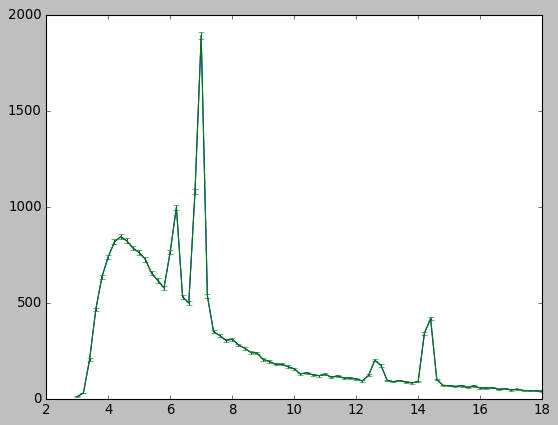

In [109]:
# NaCl-Kristall
winkel4, zahlrate4 = np.loadtxt('NaCl.txt', usecols=(0,1), unpack =True, converters={0:comma_to_float, 1:comma_to_float})
fehler_zahlrate4 = np.sqrt(zahlrate4/5)
plt.errorbar(winkel4, zahlrate4, yerr = fehler_zahlrate4)
plt.show()

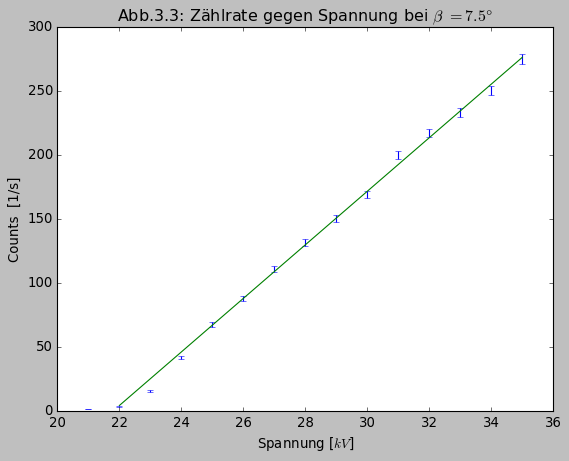

21.794866443
20.9281468612 -456.126165739 0.292671557885 8.69272296863
2.82381798346e-10 1.87013681041e-12


In [150]:
def lin(x, k, b):
    return x*k+b
Zahl = np.array([1.5, 3.4, 15.7, 41.8, 67.7, 87.95, 110.7, 131.6, 150.1, 169.3, 199.9, 217., 233.3, 250.6, 275.1])
U = np.linspace(21, 35, 15)
fehler_Zahl = np.sqrt(Zahl/20)
plt.errorbar(U, Zahl, yerr = fehler_Zahl, linestyle='None')
poptU, pcovU = curve_fit(lin, U[3:], Zahl[3:])
plt.plot(U[1:], lin(U[1:], *poptU))
plt.xlabel('Spannung [$kV$]')
plt.ylabel('Counts  [1/s]')
plt.title('Abb.3.3: Zählrate gegen Spannung bei $\\beta$ $= 7.5 \degree$')
plt.show()
plt.savefig('roentgen2.pdf',format='pdf', pixel=1000.)
print(-poptU[1]/poptU[0])
print(*poptU, np.sqrt(pcovU[0][0]), np.sqrt(pcovU[1][1]))

def y(x,t,dx, dt):
    return np.sqrt((dx/np.sin(t))**2+(x*np.cos(t)*dt/np.sin(t)**2)**2)
def z(x, t):
    return x/np.sin(t)
print(z(7.0218e-11,0.2513),y(7.0218e-11,0.2513, 0.00077e-11, 0.0017))